# Data Analysis

This project focuses on tree species classification using Sentinel-2 satellite imagery. The dataset contains pixel time series of individual trees, generated by linking the German National Forest Inventory (BWI) 2012 and 2022 data with Sentinel-2 observations. The goal is to train machine learning models for automated tree species identification to support environmental monitoring and sustainable forest management.

This notebook aims to develop a thorough understanding of the data and to extract and visualize key insights for subsequent analyses.

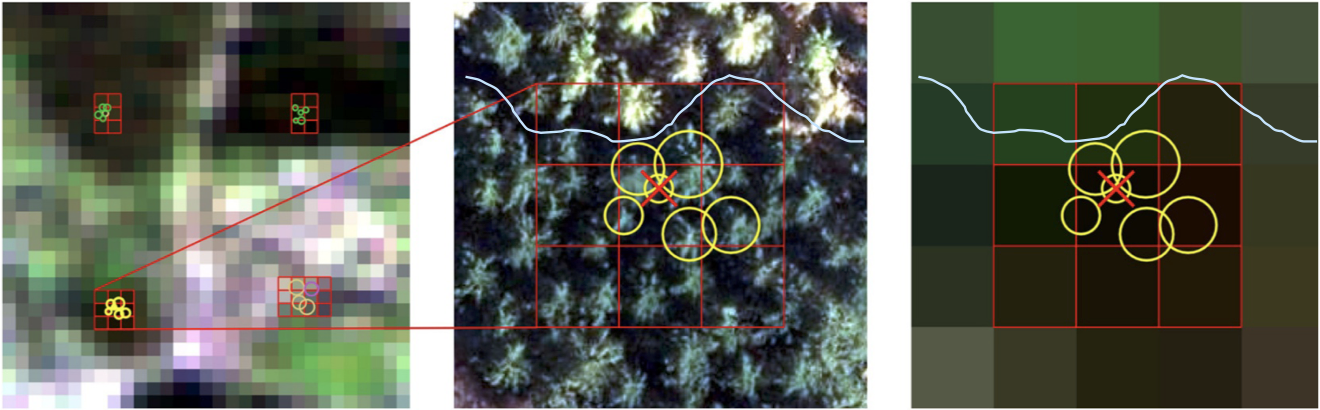

Table of Contents 
1. Setup & Imports
2. Initial Dataset Overview
3. Feature Engineering
4. Exploratory Data Analysis (EDA)
5. Correlation Analysis
6. Analysis of Disturbances
7. Spectral Band Exploration
8. Time Series Overview
9. Time Series Progression
10. Seasonal/Cyclic Time Series Analysis
11. Stationarity Analysis
12. Principal Component Analysis (PCA)

## Setup & Imports

In [1]:
from utils.constants import spectral_bands
from utils.data_loader import DataLoader
from utils.calculate_indices import CalculateIndices
from utils.basic_analysis import BasicDataAnalysis

from utils.time_series_aggregate import TimeSeriesAggregate
from utils.correlation_analysis import CorrelationAnalysis
from utils.sits_outlier_cleaner import SITSOutlierCleaner
from utils.analysis_disturbed import DisturbedYearAnalysis
from utils.dimensionality_reduction import SITS_DimensionalityReduction
from utils.stationarity_analyzer import StationarityAnalyzer


from utils.visualization_utils.visualization_histogram import HistogramDataVisualization
from utils.visualization_utils.visualization_spectral import SpectralBandPlotter
from utils.visualization_utils.visualization_time_series import (
    plot_date_diff_distribution,
)
from utils.visualization_utils.visualization_function import (
    plot_intervals_timestamps,
    plot_top_correlations,
    plot_autocorrelation_bands,
    plot_band_differences,
    plot_timeseries,
)
from utils.visualization_utils.visualization_anomaly_detection import (
    plot_with_outliers_subplot,
    plot_outlier_detection_grid,
)

### Load Dataset

In [2]:
dataloader = DataLoader()
df_base = dataloader.load_transform("../data/raw/raw_trainset.csv")

## Initial Dataset Overview

In [3]:
basicanalysis = BasicDataAnalysis(df_base)
basicanalysis.get_dtypes()

time                datetime64[ns]
id                           int64
disturbance_year           float64
doy                        float64
b2                         float64
b3                         float64
b4                         float64
b5                         float64
b6                         float64
b7                         float64
b8                         float64
b8a                        float64
b11                        float64
b12                        float64
species                     object
dtype: object

In [4]:
basicanalysis.show_overview()

Number of rows: 3927272
Number of columns: 15
Unique IDs: 28212
Unique species: 7
Earliest time: 2017-01-01 00:00:00
Latest time: 2022-11-02 00:00:00
Is id + species unique? True


In [5]:
basicanalysis.get_description()

time            id  disturbance_year  \
count                        3927272  3.927272e+06      3.927272e+06   
mean   2020-02-03 09:45:20.828504064  1.408771e+04      2.522813e+02   
min              2017-01-01 00:00:00  1.000000e+00      0.000000e+00   
25%              2018-09-21 00:00:00  7.040000e+03      0.000000e+00   
50%              2020-03-11 00:00:00  1.406400e+04      0.000000e+00   
75%              2021-06-15 00:00:00  2.113500e+04      0.000000e+00   
max              2022-11-02 00:00:00  2.821200e+04      2.020000e+03   
std                              NaN  8.145143e+03      6.674802e+02   

                doy            b2            b3            b4            b5  \
count  3.927272e+06  3.927272e+06  3.927272e+06  3.927272e+06  3.927272e+06   
mean   1.766685e+02  2.721160e+02  4.303420e+02  3.456789e+02  6.755292e+02   
min    1.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.060000e+02  1.560000e+02  2.810000e+02  1.750000e+02  4.600000e+02   
50%    1.760000e+02  2.230000e+02  3.700000e+02  2.570000e+02  5.880000e+02   
75%    2.450000e+02  3.210000e+02  5.020000e+02  3.980000e+02  7.820000e+02   
max    3.660000e+02  2.008700e+04  1.753400e+04  1.752400e+04  1.794000e+04   
std    8.540810e+01  2.201566e+02  2.598807e+02  3.079291e+02  3.476790e+02   

                 b6            b7            b8           b8a           b11  \
count  3.927272e+06  3.927272e+06  3.927272e+06  3.927272e+06  3.927272e+06   
mean   1.682321e+03  2.039359e+03  2.166000e+03  2.289724e+03  1.156046e+03   
min    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.268000e+03  1.528000e+03  1.629000e+03  1.740000e+03  7.280000e+02   
50%    1.547000e+03  1.856000e+03  1.971000e+03  2.091000e+03  1.008000e+03   
75%    1.923000e+03  2.326000e+03  2.462000e+03  2.608000e+03  1.438000e+03   
max    1.982700e+04  2.143900e+04  2.181100e+04  2.469400e+04  1.855400e+04   
std    6.454289e+02  8.020606e+02  8.528701e+02  8.593425e+02  6.080103e+02   

                b12  
count  3.927272e+06  
mean   5.999256e+02  
min    1.000000e+00  
25%    3.350000e+02  
50%    4.800000e+02  
75%    7.070000e+02  
max    1.758700e+04  
std    4.184314e+02

In [6]:
basicanalysis.get_missing_counts()

column_name  missing_count
0               time              0
1                 id              0
2   disturbance_year              0
3                doy              0
4                 b2              0
5                 b3              0
6                 b4              0
7                 b5              0
8                 b6              0
9                 b7              0
10                b8              0
11               b8a              0
12               b11              0
13               b12              0
14           species              0

## Feature Engineering

### Basic Feature Engineering

In [7]:
df = dataloader.feature_extraction(df_base)

### Datetime Feature Engineering

In [8]:
df = dataloader.date_feature_extraction(df)

### Advanced Feature Engineering

In [9]:
calcindices = CalculateIndices()
df = calcindices.add_all_indices(df)

## Exploratory Data Analysis (EDA)

### Visualization of the base dataframe 

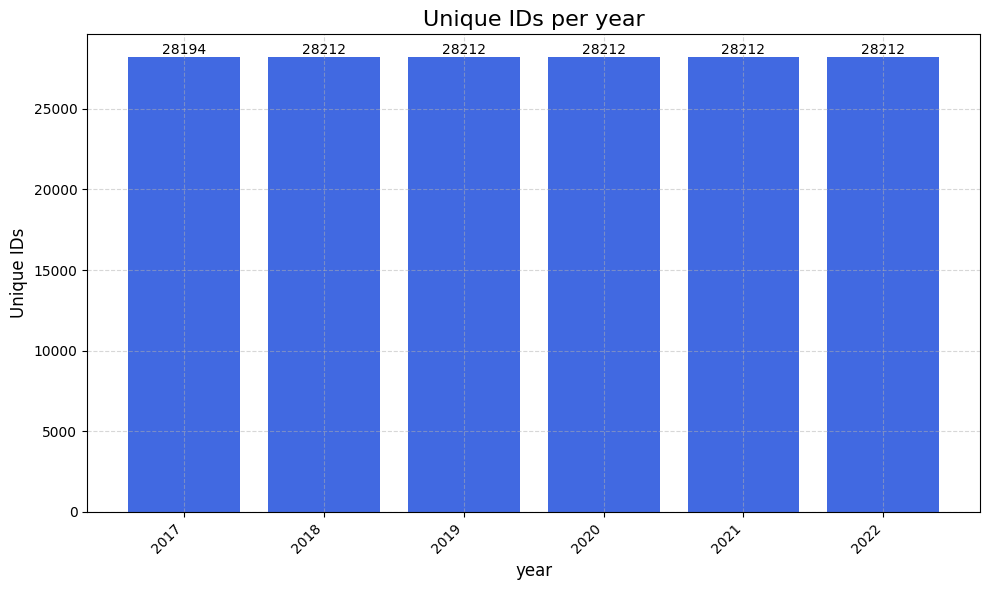

In [10]:
hist = HistogramDataVisualization(df)
hist.plot_unique_ids("year")

<div class="alert-info">
The distribution over the years clearly shows that the frequencies fluctuate only within a very narrow range.
</div>

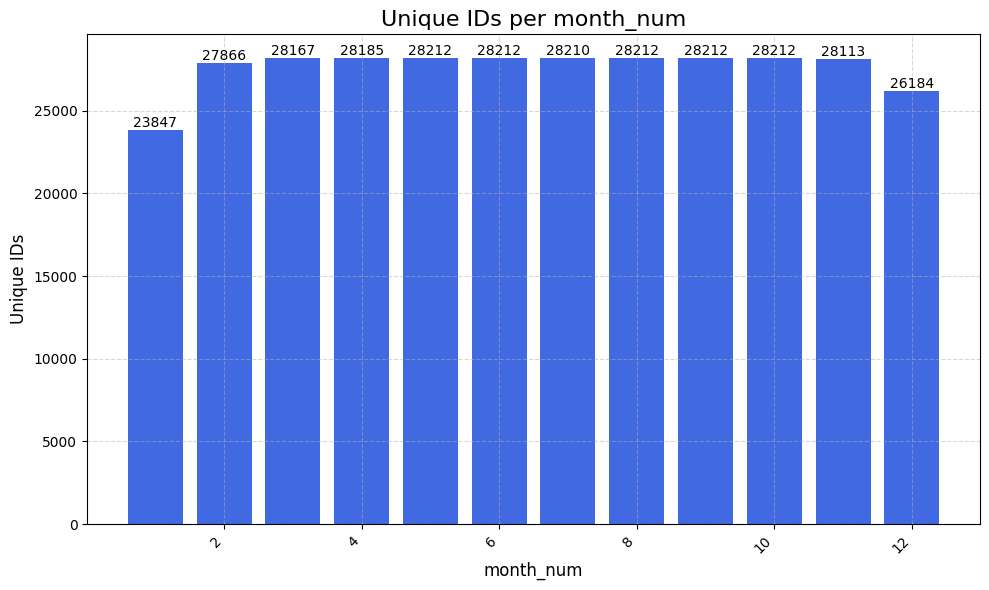

In [11]:
hist.plot_unique_ids("month_num")

<div class="alert-info">
The distribution of the occurring IDs shows that in the winter months of January and December, there is a noticeably lower frequency compared to the other months. It is assumed that this is due to the preprocessing step, during which many cloudy images were removed. Therefore, for the subsequent analysis, the aggregation of the data should be performed using an appropriate resampling interval that ensures the results remain meaningful and representative.
</div>

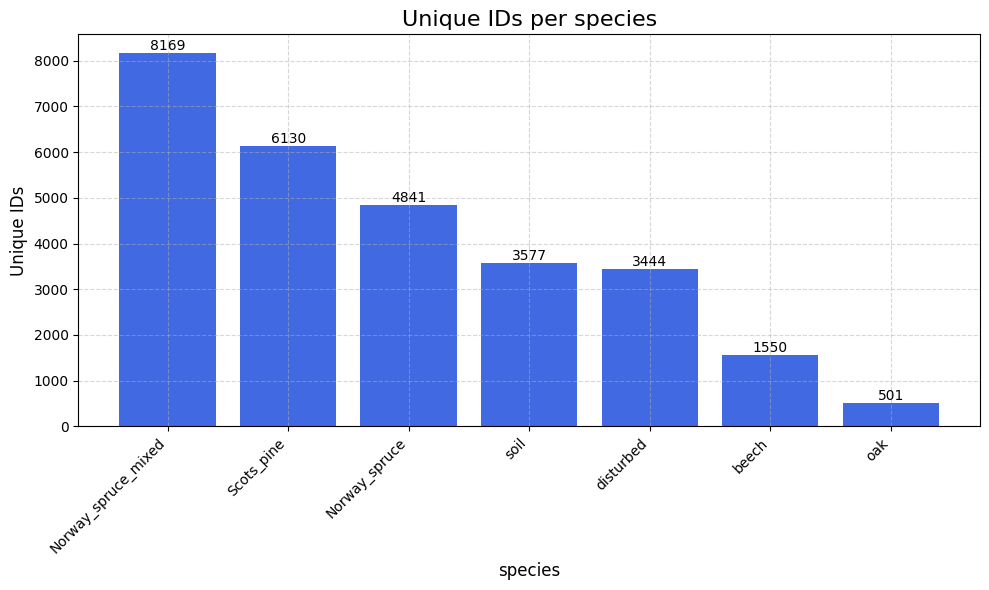

In [12]:
hist.plot_unique_ids("species")

<div class="alert-info">
The seven categories show a clear difference in their frequency of occurrence. In general, they represent five tree species (including a mixed category), one disturbed class, and one soil class.
</div>

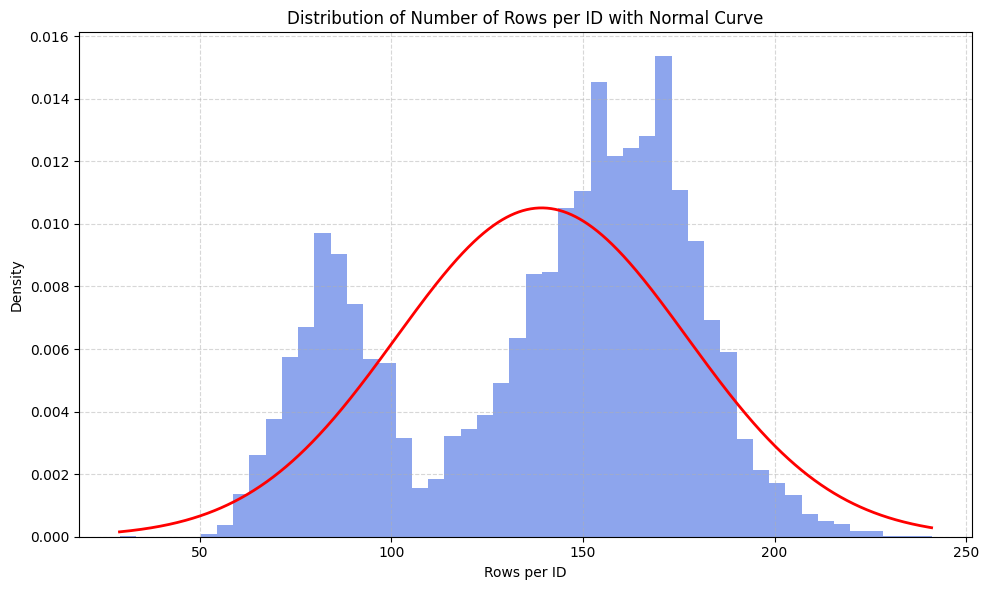

In [13]:
hist.plot_id_distribution()

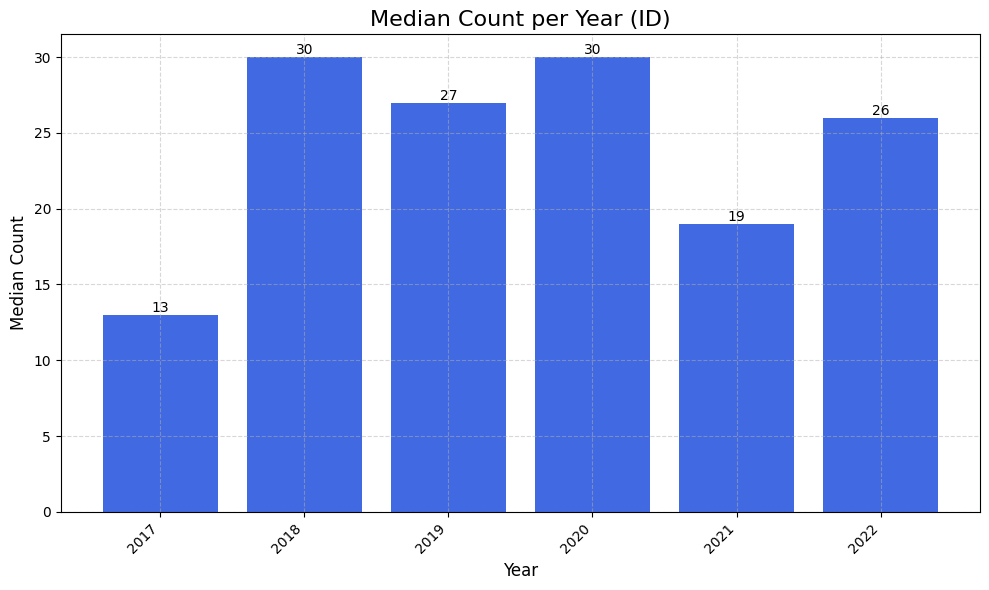

In [14]:
hist.plot_median_id_distribution()

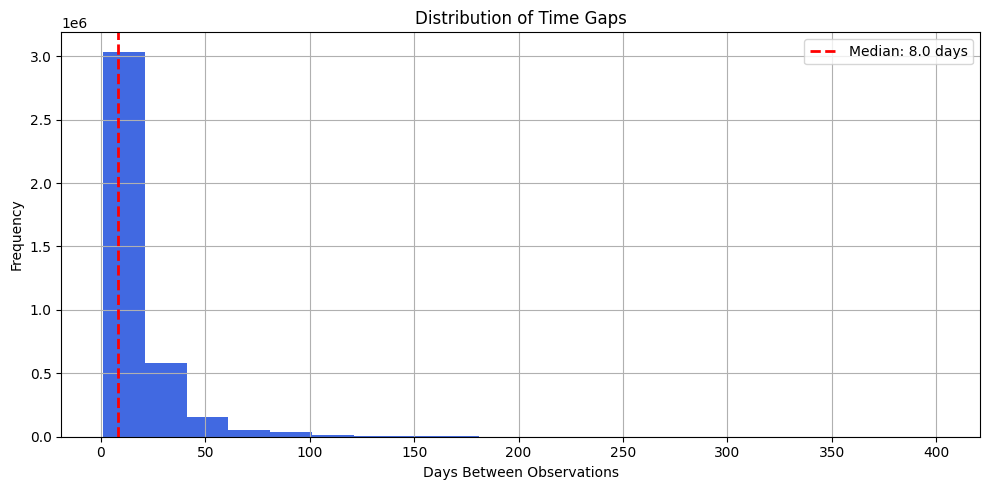

In [15]:
plot_date_diff_distribution(df)

<div class="alert-info">
The difference in the various time gaps has a median of 8 days but shows high variance. It becomes evident that time series contain only rarely occurring observations.
</div>

## Correlation Analysis

In [16]:
correlation = CorrelationAnalysis(df)
corr_matrix = correlation.get_correlation_matrix()
corr_matrix

id  disturbance_year     doy      b2      b3      b4  \
id                1.0000           -0.0092 -0.0005 -0.0074 -0.0069 -0.0074   
disturbance_year -0.0092            1.0000  0.0005  0.0652  0.0490  0.1015   
doy              -0.0005            0.0005  1.0000 -0.0588 -0.0435 -0.0805   
b2               -0.0074            0.0652 -0.0588  1.0000  0.9414  0.9143   
b3               -0.0069            0.0490 -0.0435  0.9414  1.0000  0.9288   
b4               -0.0074            0.1015 -0.0805  0.9143  0.9288  1.0000   
b5               -0.0065            0.0721 -0.0699  0.8329  0.9437  0.9105   
b6               -0.0020           -0.0531  0.0631  0.3762  0.5870  0.3609   
b7               -0.0008           -0.0701  0.0851  0.2817  0.4892  0.2605   
b8                0.0002           -0.0644  0.0860  0.2832  0.4931  0.2675   
b8a              -0.0005           -0.0607  0.0872  0.2795  0.4883  0.2718   
b11              -0.0059            0.1230 -0.0491  0.6252  0.7678  0.7684   
b12              -0.0067            0.1269 -0.0916  0.7272  0.8172  0.8778   
is_disturbed     -0.0092            1.0000  0.0005  0.0653  0.0491  0.1016   
month_num        -0.0004            0.0010  0.9948 -0.0602 -0.0441 -0.0813   
year              0.0001            0.0023 -0.1301  0.0524  0.0577  0.0750   
date_diff         0.0018            0.0078 -0.0765 -0.0226 -0.0505 -0.0367   
ndvi              0.0060           -0.1701  0.1725 -0.7096 -0.6511 -0.8179   
gndvi             0.0049           -0.1375  0.1544 -0.7202 -0.6631 -0.7523   
wdvi              0.0016           -0.0855  0.1039  0.1221  0.3364  0.0899   
tndvi             0.0060           -0.1616  0.1627 -0.7141 -0.6558 -0.8199   
savi              0.0060           -0.1702  0.1725 -0.7095 -0.6509 -0.8178   
ipvi              0.0060           -0.1701  0.1725 -0.7096 -0.6511 -0.8179   
mcari             0.0013           -0.0569  0.0595 -0.1177 -0.0200 -0.1462   
reip             -0.0001           -0.0138  0.0269 -0.0244 -0.0252 -0.0284   
masvi2            0.0010            0.0096 -0.0153 -0.0640 -0.1087 -0.0723   
dvi               0.0030           -0.1044  0.1188 -0.0485  0.1630 -0.0966   

                      b5      b6      b7      b8  ...    ndvi   gndvi    wdvi  \
id               -0.0065 -0.0020 -0.0008  0.0002  ...  0.0060  0.0049  0.0016   
disturbance_year  0.0721 -0.0531 -0.0701 -0.0644  ... -0.1701 -0.1375 -0.0855   
doy              -0.0699  0.0631  0.0851  0.0860  ...  0.1725  0.1544  0.1039   
b2                0.8329  0.3762  0.2817  0.2832  ... -0.7096 -0.7202  0.1221   
b3                0.9437  0.5870  0.4892  0.4931  ... -0.6511 -0.6631  0.3364   
b4                0.9105  0.3609  0.2605  0.2675  ... -0.8179 -0.7523  0.0899   
b5                1.0000  0.6515  0.5532  0.5567  ... -0.6357 -0.5870  0.4056   
b6                0.6515  1.0000  0.9796  0.9705  ...  0.0541  0.0616  0.9357   
b7                0.5532  0.9796  1.0000  0.9820  ...  0.1508  0.1719  0.9664   
b8                0.5567  0.9705  0.9820  1.0000  ...  0.1485  0.1483  0.9837   
b8a               0.5665  0.9758  0.9888  0.9820  ...  0.1347  0.1606  0.9643   
b11               0.8849  0.6660  0.6020  0.6095  ... -0.5371 -0.4341  0.4866   
b12               0.8995  0.4894  0.4060  0.4124  ... -0.7037 -0.6001  0.2624   
is_disturbed      0.0722 -0.0529 -0.0700 -0.0643  ... -0.1702 -0.1375 -0.0854   
month_num        -0.0696  0.0652  0.0872  0.0878  ...  0.1746  0.1570  0.1060   
year              0.0853  0.0413  0.0323  0.0373  ... -0.0813 -0.0580  0.0245   
date_diff        -0.0628 -0.1117 -0.1174 -0.1143  ... -0.0078 -0.0243 -0.1112   
ndvi             -0.6357  0.0541  0.1508  0.1485  ...  1.0000  0.9346  0.3061   
gndvi            -0.5870  0.0616  0.1719  0.1483  ...  0.9346  1.0000  0.2936   
wdvi              0.4056  0.9357  0.9664  0.9837  ...  0.3061  0.2936  1.0000   
tndvi            -0.6348  0.0469  0.1417  0.1402  ...  0.9964  0.9351  0.2979   
savi             -0.6355  0.0545  0.1511  0.1489  ...  

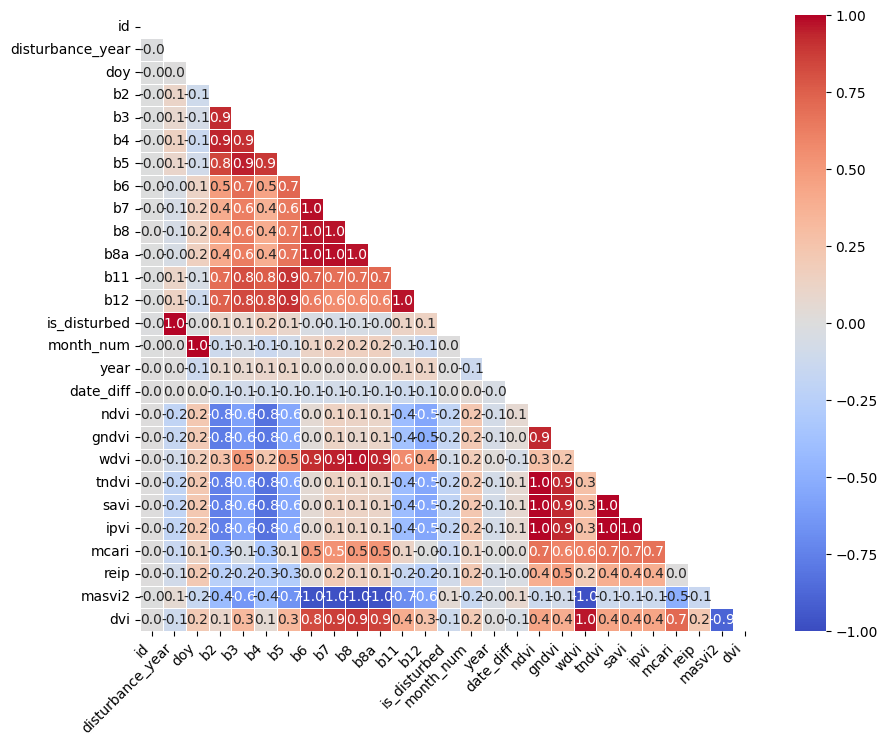

In [17]:
correlation.plot_correlation_matrix()

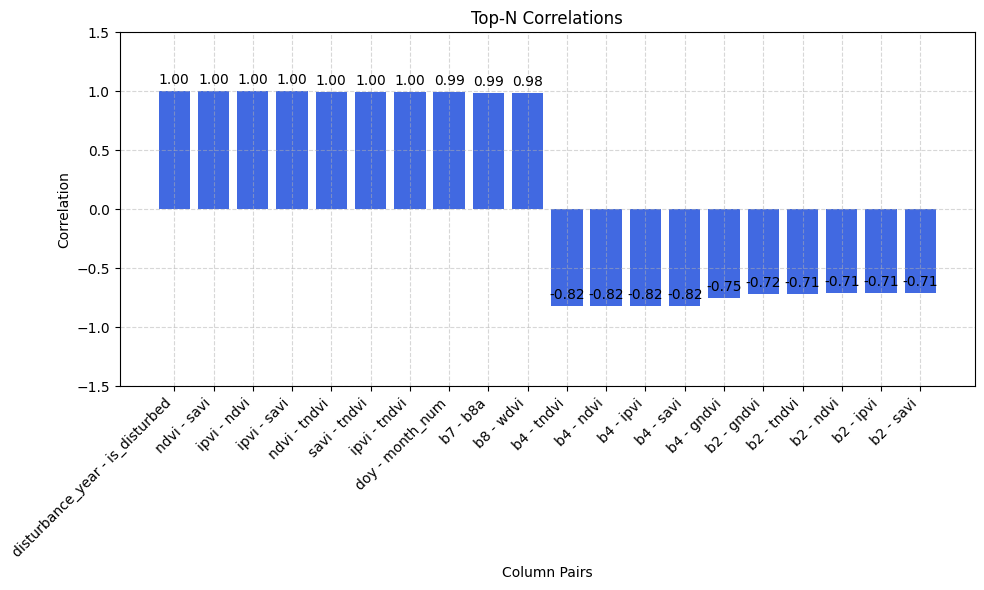

In [18]:
top_corr_df = correlation.get_top_correlations(top_n=10)
plot_top_correlations(top_corr_df)

<div class="alert-info">
In the Pearson correlation, we observe strong correlations forming between the indices; however, these are not very meaningful. Therefore, it is necessary to use other methods to capture the true relationships.
</div>


## Analysis of Disturbances

In [19]:
analysis = DisturbedYearAnalysis(df)
analysis.summary_unique_years()

Number of unique values: 22
Unique values:
[   0. 2018. 2020. 2014. 2011. 2017. 2019. 2013. 2009. 2016. 2015. 2006.
 2012. 2007. 2004. 2003. 1986. 2005. 1998. 1995. 2001. 2010.]


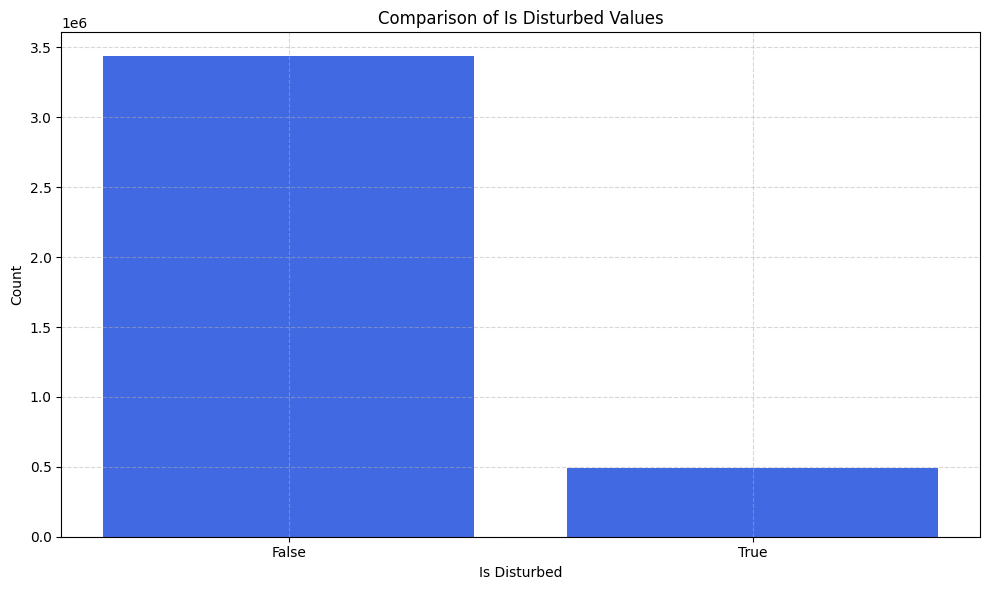

In [20]:
analysis.plot_disturbed_counts()

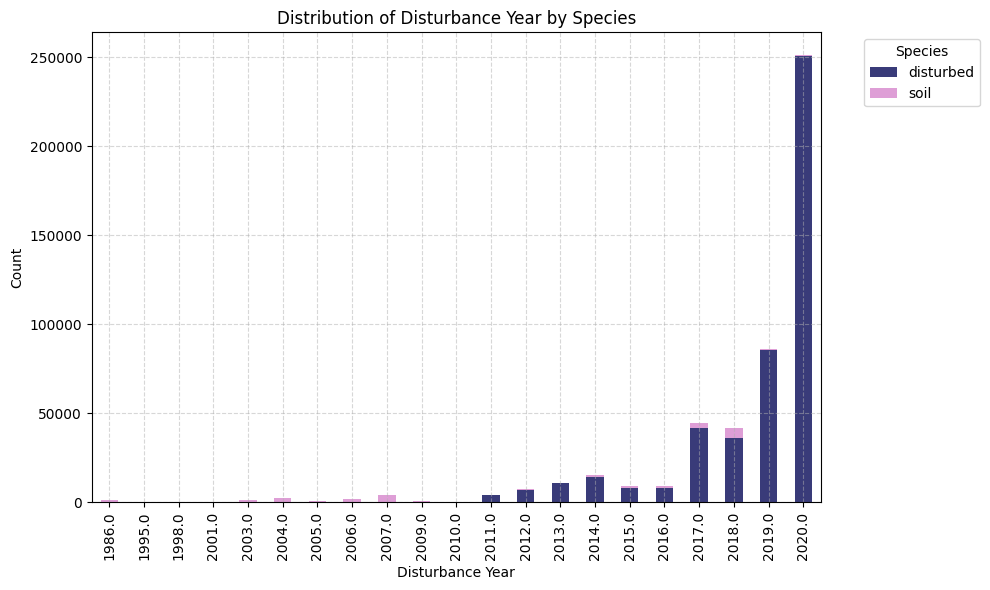

In [21]:
analysis.plot_disturbance_by_species()

<div class="alert-info">

- The distribution of disturbance year and the corresponding species can be observed, going back up to 30 years from the marking year.

- The affected species are **soil and disturbed**.
</div>

## Spectral Band Exploration

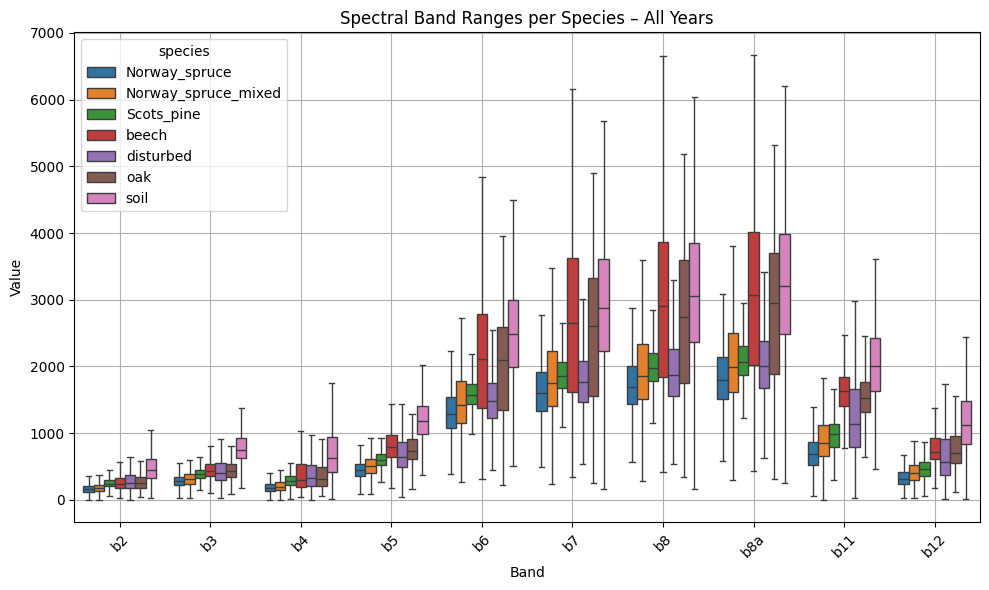

In [22]:
spectral = SpectralBandPlotter(df)
spectral.plot_all_years(sample_size=5000, showfliers=False)

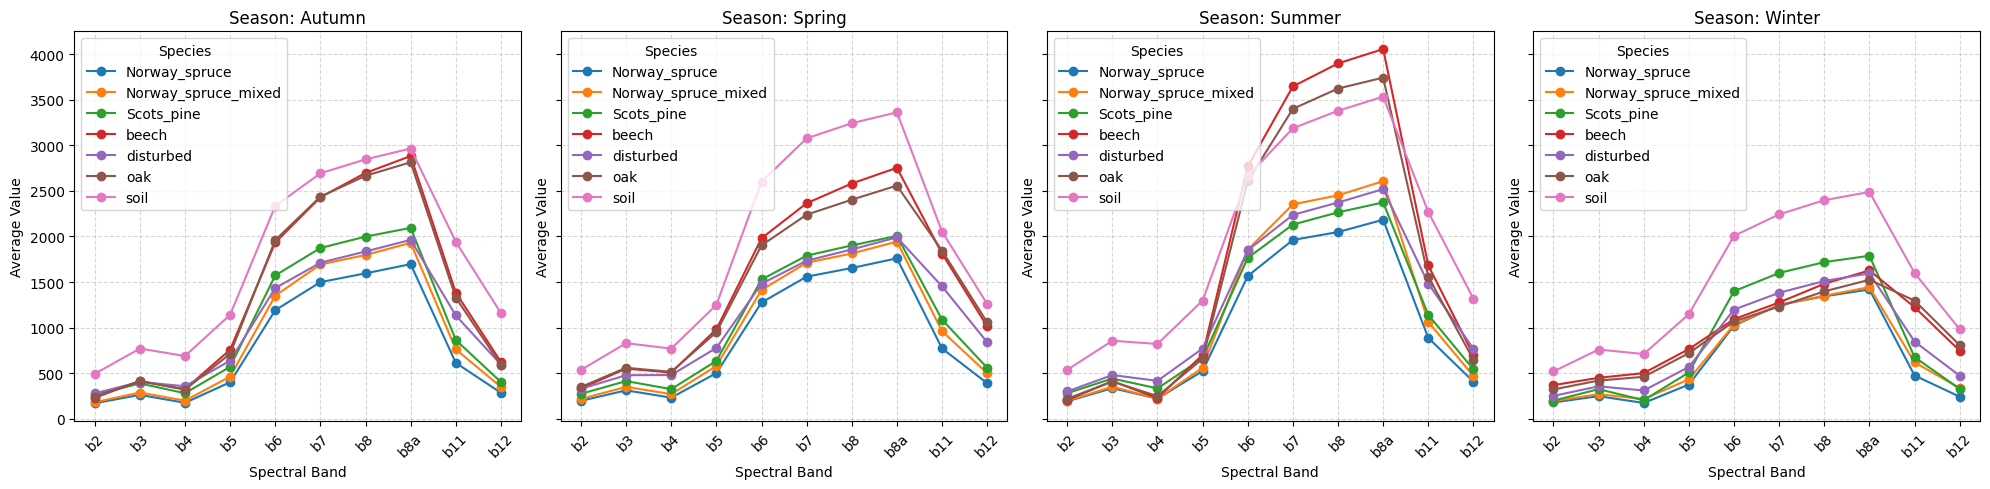

In [23]:
spectral.plot_species_season_distribution()

### Deeper analysis of deviating values

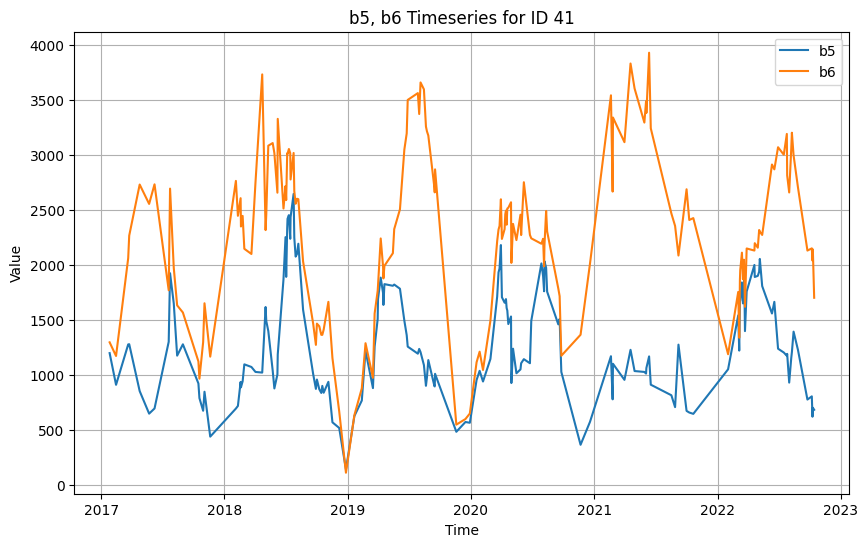

In [24]:
df_soil = df[df["species"] == "soil"]
plot_timeseries(df_soil, "b5", "b6", 41)

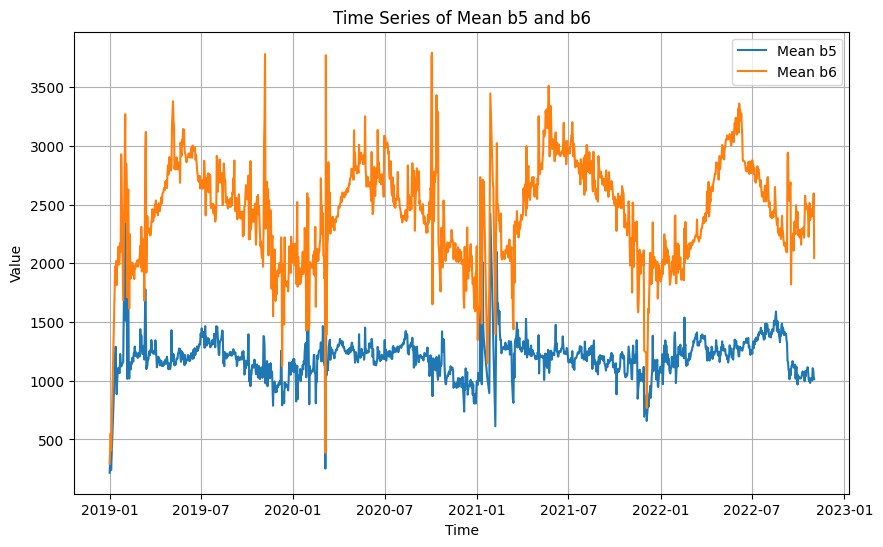

In [25]:
plot_timeseries(df_soil, "b5", "b6", agg=True, year_filter=2019)

<div class="alert-info">

During the calculation of the indices, it was observed that the identical values in bands B5 and B6 prevented the indices from being computed. These visualizations are intended to show the temporal progression of each band, helping to understand why the values are identical. The insights gained from this analysis will be taken into account in the subsequent steps to ensure that the indices can be correctly calculated.
</div>

## Time Series Overview

<div class="alert-info">

In the time series analysis, **ID10** is used as an example to demonstrate different aggregations and methods, which can later be applied to the entire dataset.
</div>

### Anomaly Detection

Processing IDs: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


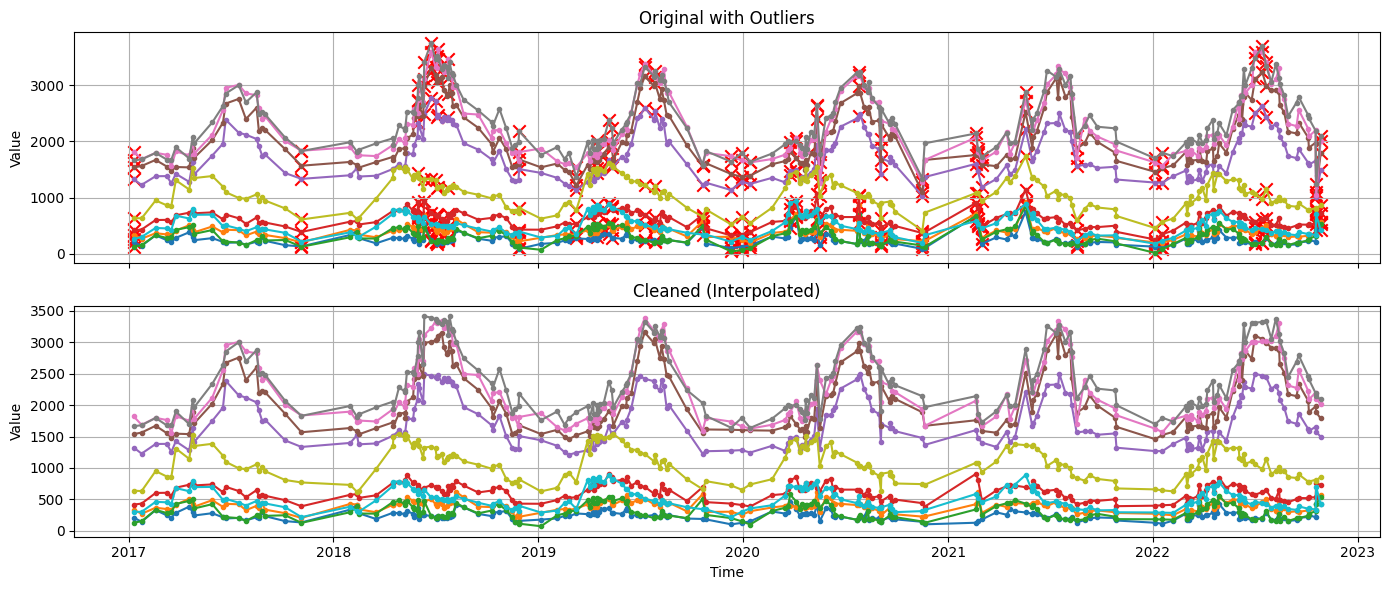

time  id  disturbance_year    doy     b2     b3     b4     b5  \
0   2017-01-10  10               0.0   10.0  209.0  334.0  130.0  417.0   
1   2017-01-24  10               0.0   24.0  144.0  271.0  152.0  433.0   
2   2017-02-18  10               0.0   49.0  330.0  367.0  334.0  602.0   
3   2017-03-10  10               0.0   69.0  245.0  346.0  282.0  605.0   
4   2017-03-18  10               0.0   77.0  209.0  333.0  301.0  559.0   
..         ...  ..               ...    ...    ...    ...    ...    ...   
193 2022-10-05  10               0.0  278.0  221.0  324.0  241.0  519.0   
194 2022-10-06  10               0.0  279.0  252.0  346.0  269.0  531.0   
195 2022-10-18  10               0.0  291.0  215.0  331.0  314.0  533.0   
196 2022-10-19  10               0.0  292.0  430.0  540.0  427.0  754.0   
197 2022-10-27  10               0.0  300.0  430.0  574.0  540.0  730.0   

         b6      b7  ...  b3_original  b4_original  b5_original  b6_original  \
0    1323.0  1538.0  ...        334.0        130.0        417.0       1323.0   
1    1228.0  1563.0  ...        271.0        152.0        433.0       1228.0   
2    1381.0  1671.0  ...        367.0        334.0        602.0       1381.0   
3    1383.0  1553.0  ...        346.0        282.0        605.0       1383.0   
4    1254.0  1478.0  ...        333.0        301.0        559.0       1254.0   
..      ...     ...  ...          ...          ...          ...          ...   
193  1617.0  2065.0  ...        324.0        241.0        519.0       1617.0   
194  1586.0  1888.0  ...        346.0        269.0        531.0       1586.0   
195  1656.0  1978.0  ...        331.0        314.0        533.0       1656.0   
196  1575.5  1883.0  ...        540.0        586.0        754.0       1015.0   
197  1495.0  1788.0  ...        574.0        540.0        730.0       1495.0   

    b7_original  b8_original  b8a_original  b11_original b12_original  \
0        1538.0       1819.0        1664.0         638.0        259.0   
1        1563.0       1686.0        1680.0         632.0        302.0   
2        1671.0       1797.0        1795.0         950.0        461.0   
3        1553.0       1762.0        1677.0         863.0        453.0   
4        1478.0       1554.0        1676.0         856.0        428.0   
..          ...          ...           ...           ...          ...   
193      2065.0       2222.0        2463.0         781.0        351.0   
194      1888.0       2090.0        2411.0         782.0        359.0   
195      1978.0       2197.0        2190.0         813.0        335.0   
196      1108.0       1043.0        1244.0         792.0        701.0   
197      1788.0       2010.0        2091.0         862.0        421.0   

     any_outlier  
0           True  
1          False  
2          False  
3          False  
4          False  
..           ...  
193        False  
194        False  
195        False  
196         True  
197         True  

[198 rows x 51 columns]

In [26]:
id_df = df[df["id"] == 10]
cleaner = SITSOutlierCleaner()
cleaner.fit_transform(id_df, band_columns=spectral_bands)
df_with_any_flag = cleaner.add_any_outlier_flag()
plot_with_outliers_subplot(df_with_any_flag, spectral_bands)
df_with_any_flag

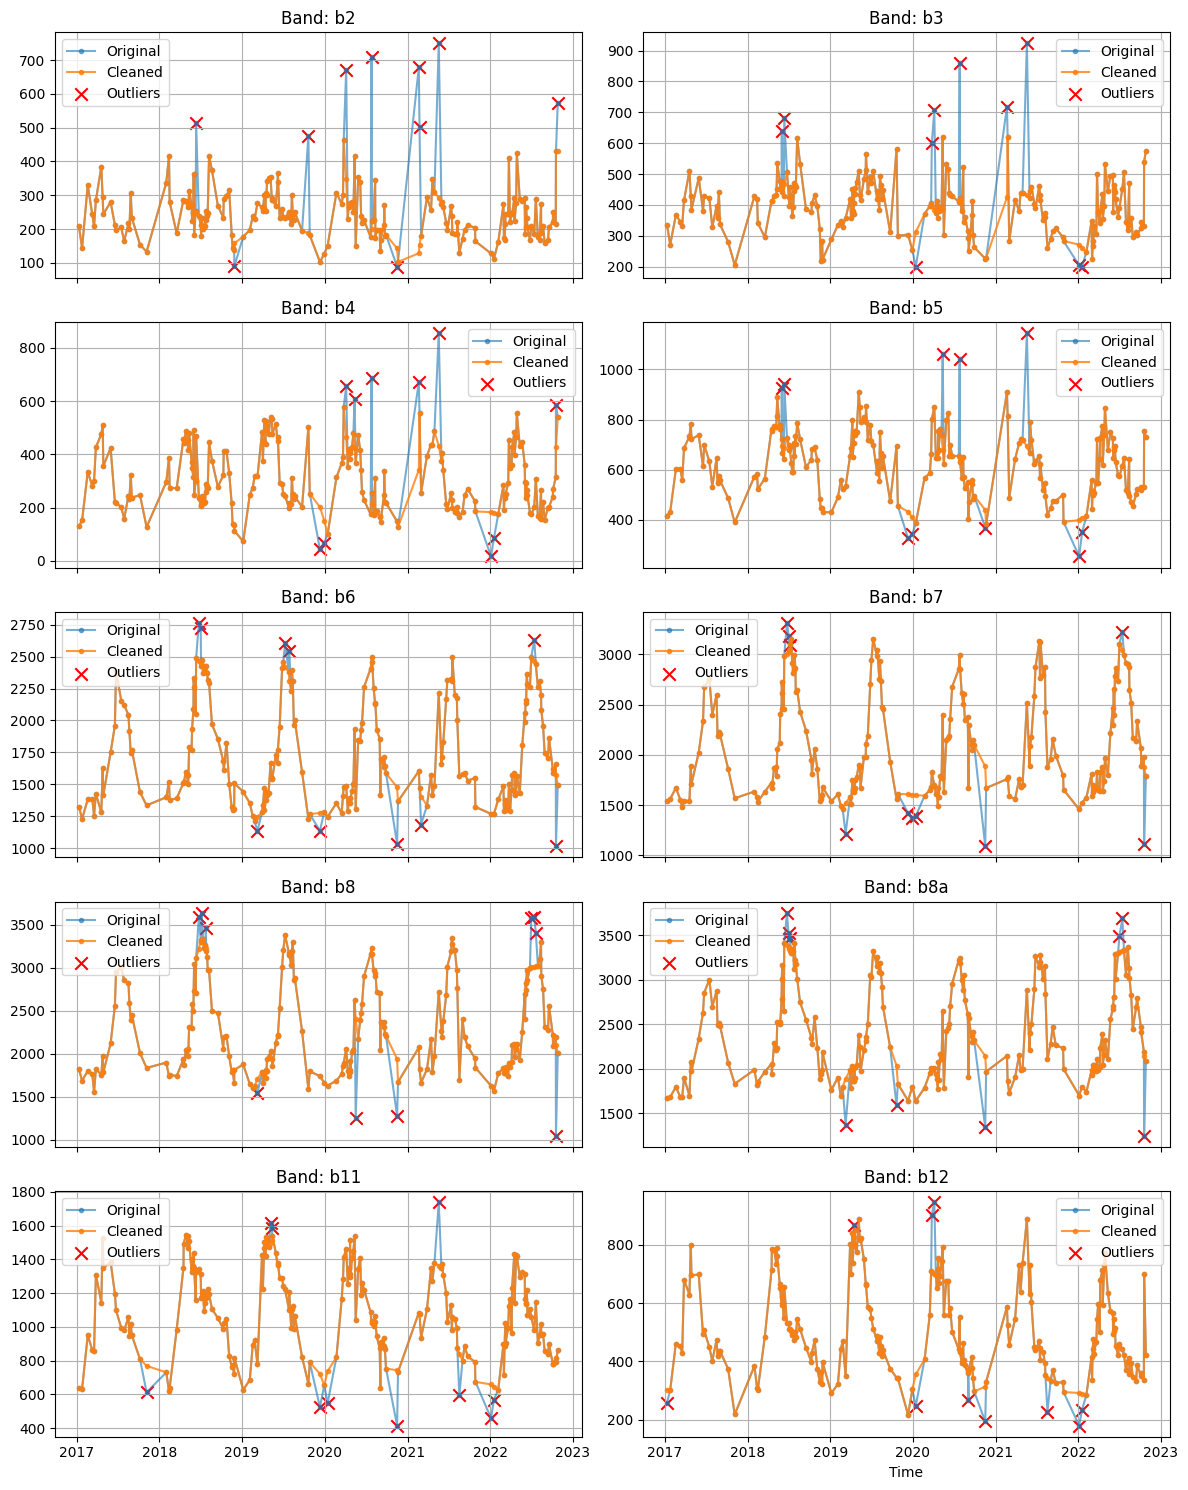

In [27]:
plot_outlier_detection_grid(df_with_any_flag, bands=spectral_bands)

In [28]:
score = cleaner.remaining_outliers_ratio()
print(f"Remaining outlier ratio (IsolationForest): {score:.2%}")

ratio = cleaner.zscore_outlier_ratio()
print(f"Outlier ratio (Z-Score method): {ratio:.2%}")

Remaining outlier ratio (IsolationForest): 19.70%
Outlier ratio (Z-Score method): 0.51%


<div class="alert-info">

**Interpretation**

Remaining outlier ratio (IsolationForest): Shows the percentage of records that the IsolationForest model still considers outliers after cleaning. A lower value means the cleaning was more effective in removing anomalies according to the model.

Outlier ratio (Z-Score method): Indicates the share of records that are statistical outliers (e.g., more than 3 standard deviations away from the mean in at least one feature). This gives a complementary, more “classical” perspective on how extreme your data points are.
</div>

## Time Series Progression

In [29]:
cleaned_id_df = cleaner.get_interpolated_only()
cleaned_id_df

id       time     b2     b3     b4     b5      b6      b7      b8  \
0    10 2017-01-10  209.0  334.0  130.0  417.0  1323.0  1538.0  1819.0   
1    10 2017-01-24  144.0  271.0  152.0  433.0  1228.0  1563.0  1686.0   
2    10 2017-02-18  330.0  367.0  334.0  602.0  1381.0  1671.0  1797.0   
3    10 2017-03-10  245.0  346.0  282.0  605.0  1383.0  1553.0  1762.0   
4    10 2017-03-18  209.0  333.0  301.0  559.0  1254.0  1478.0  1554.0   
..   ..        ...    ...    ...    ...    ...     ...     ...     ...   
193  10 2022-10-05  221.0  324.0  241.0  519.0  1617.0  2065.0  2222.0   
194  10 2022-10-06  252.0  346.0  269.0  531.0  1586.0  1888.0  2090.0   
195  10 2022-10-18  215.0  331.0  314.0  533.0  1656.0  1978.0  2197.0   
196  10 2022-10-19  430.0  540.0  427.0  754.0  1575.5  1883.0  2103.5   
197  10 2022-10-27  430.0  574.0  540.0  730.0  1495.0  1788.0  2010.0   

        b8a    b11    b12  
0    1664.0  638.0  302.0  
1    1680.0  632.0  302.0  
2    1795.0  950.0  461.0  
3    1677.0  863.0  453.0  
4    1676.0  856.0  428.0  
..      ...    ...    ...  
193  2463.0  781.0  351.0  
194  2411.0  782.0  359.0  
195  2190.0  813.0  335.0  
196  2140.5  792.0  701.0  
197  2091.0  862.0  421.0  

[198 rows x 12 columns]

In [30]:
cleaned_id_df = cleaner.get_interpolated_only()
ts_agg = TimeSeriesAggregate(cleaned_id_df)
df_2w = ts_agg.aggregate_timeseries(freq="2W", method="mean")
dataloader = DataLoader()
df_2w_agg = dataloader.date_feature_extraction(df_2w)

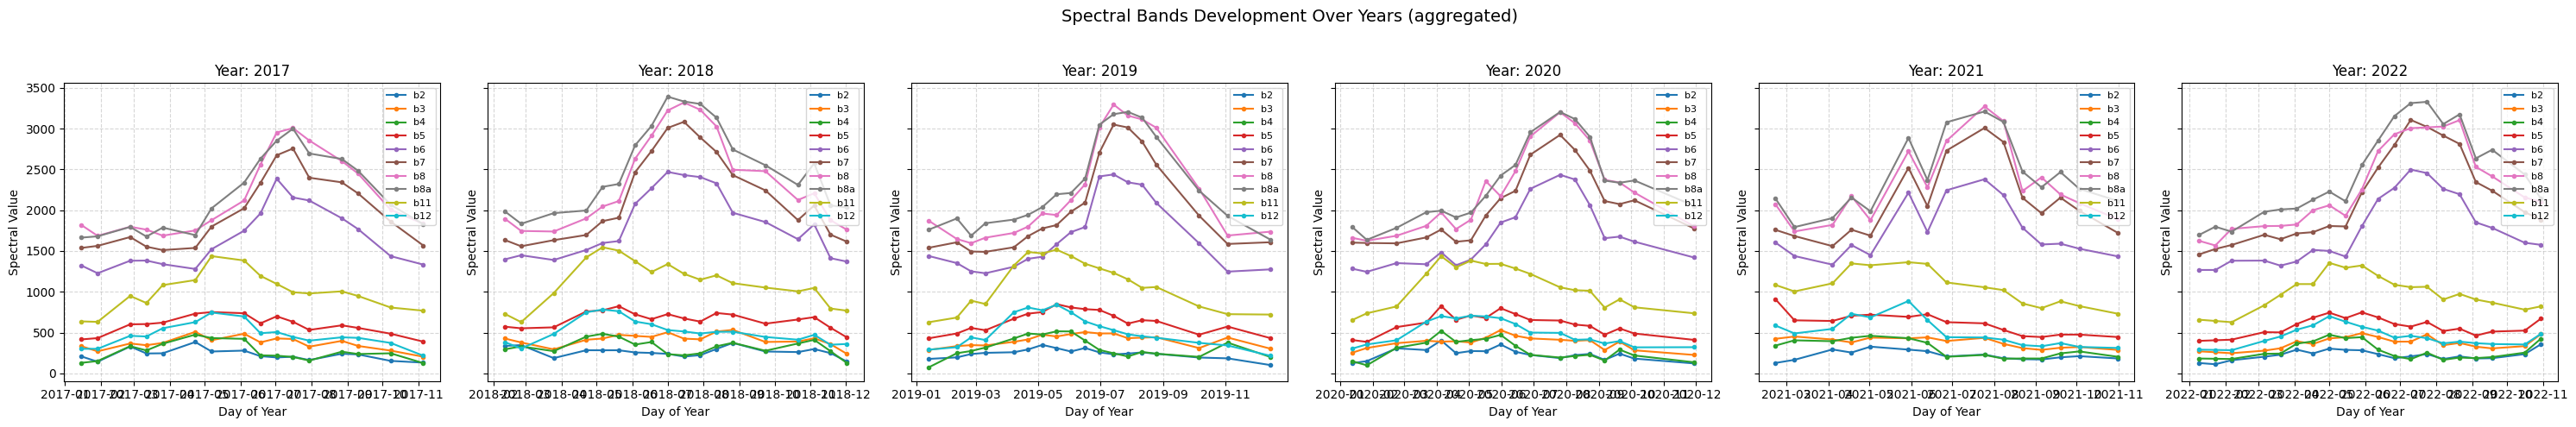

In [31]:
spectral = SpectralBandPlotter(df_2w_agg)
spectral.plot_spectral_development_over_years(addition="aggregated")

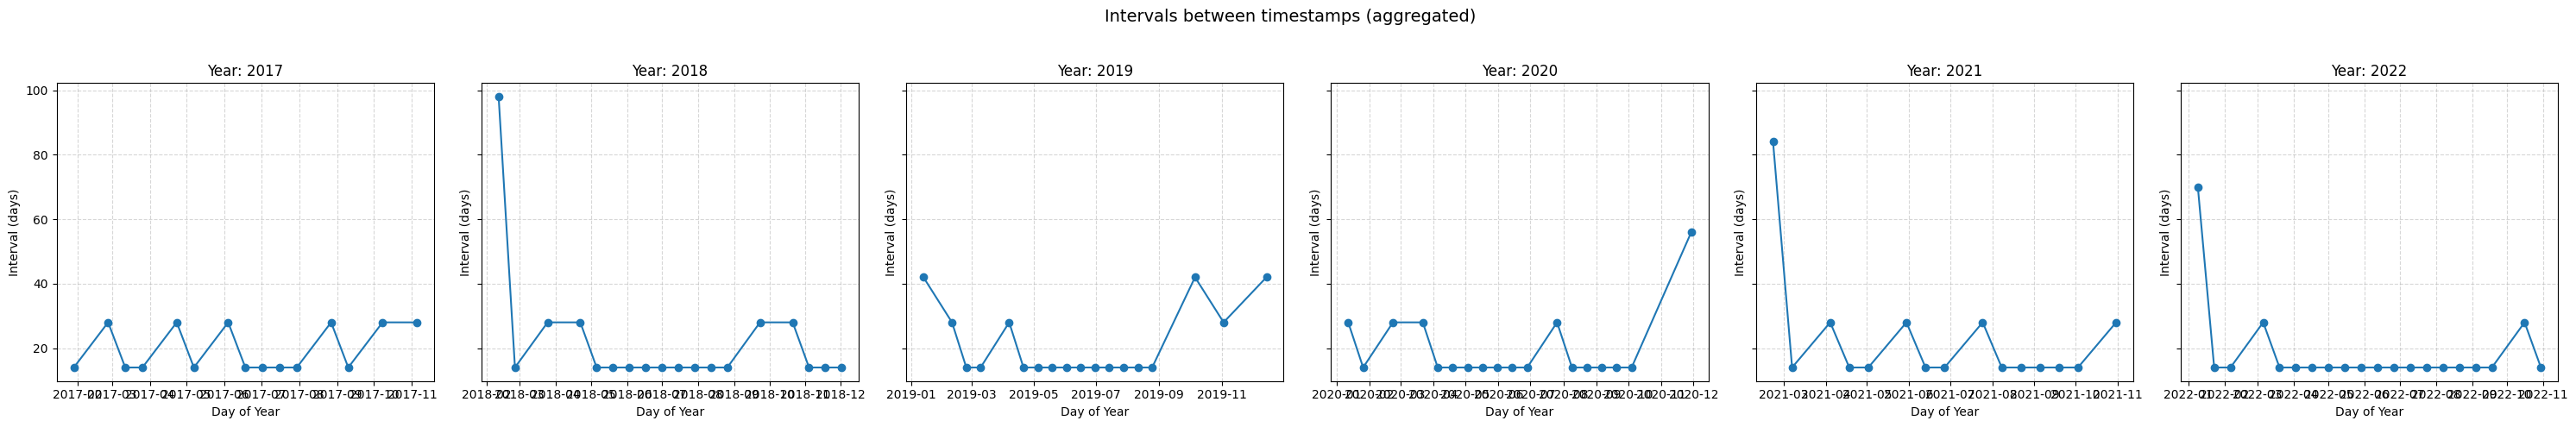

In [32]:
plot_intervals_timestamps(df_2w_agg, addition="aggregated")

### Autocorrelation

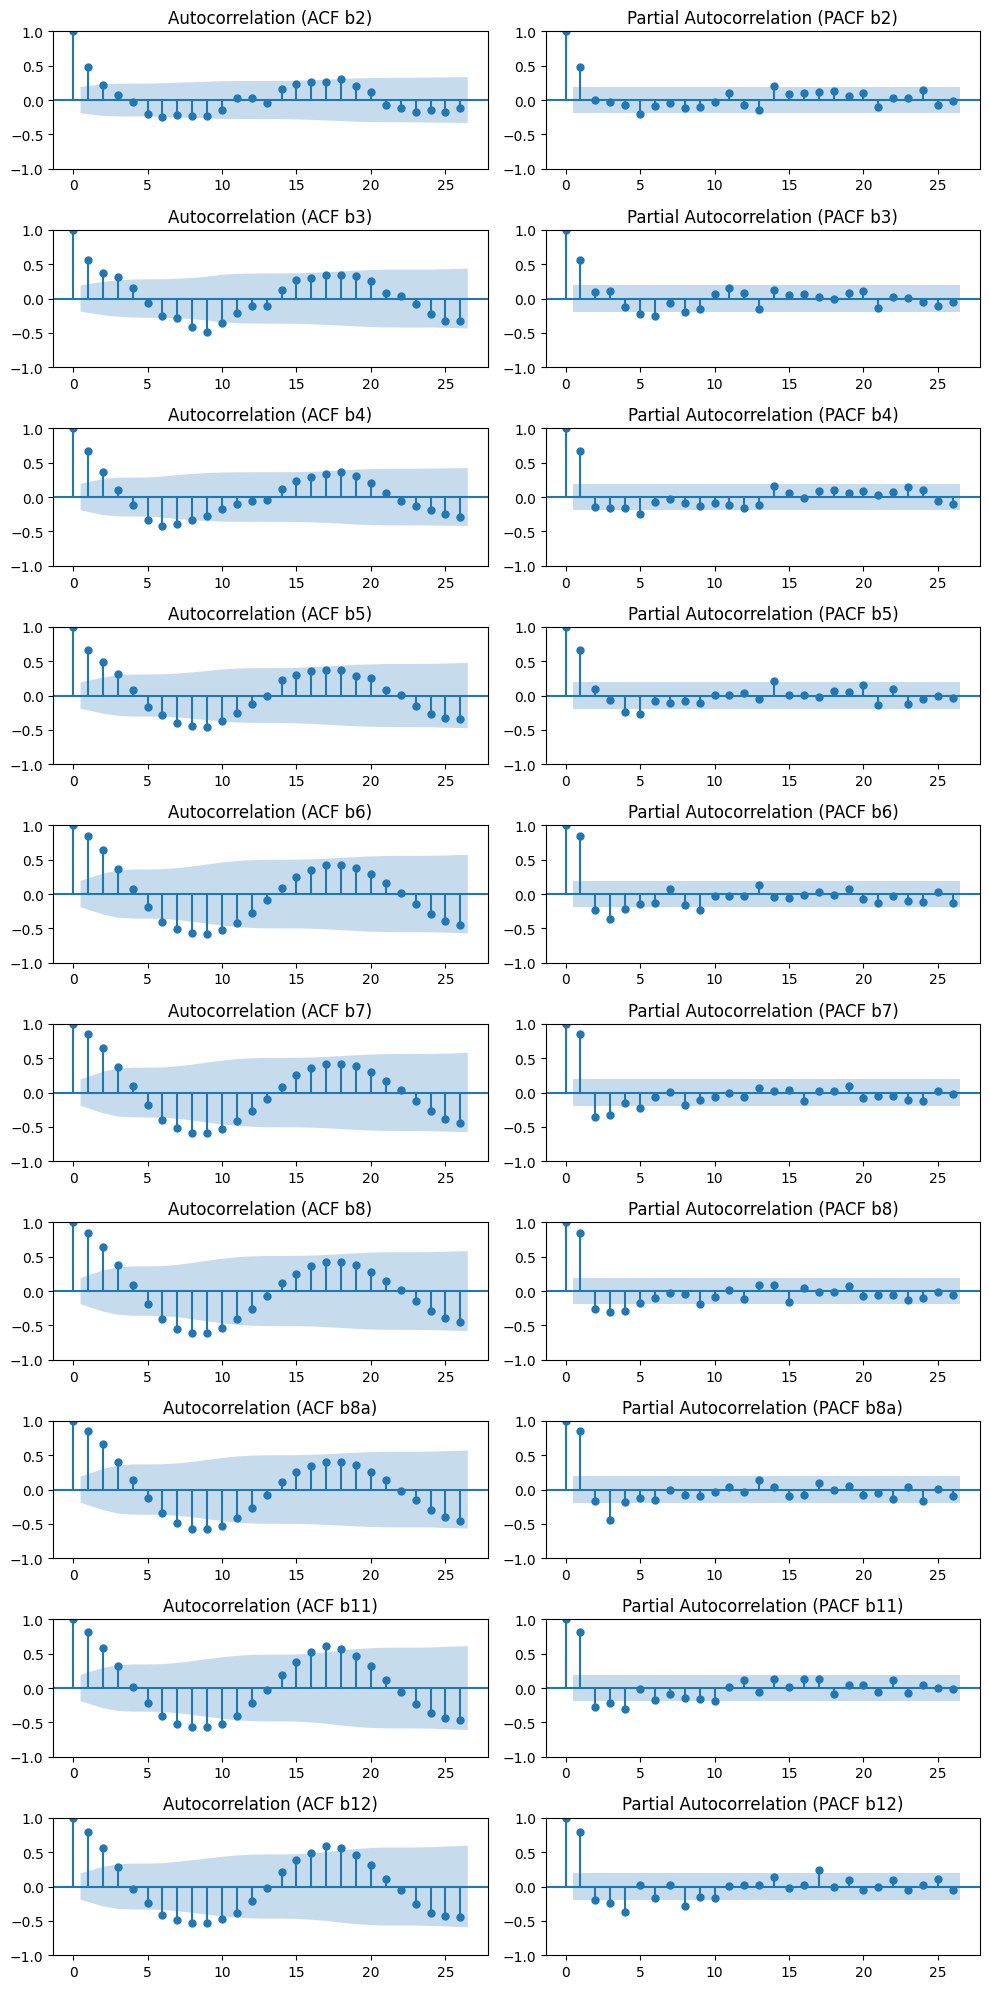

In [33]:
plot_autocorrelation_bands(df_2w_agg, spectral_bands, lags=26)

<div class="alert-info">

**The ACF and PACF plots indicate that:**
- The time series exhibit short-term autocorrelation but no strong long-term or seasonal structure.
- The decay patterns and PACF cutoffs suggest that simple autoregressive models (e.g., AR(1)) may sufficiently describe the temporal dependencies in these variables.
- The data appear stationary, which is favorable for modeling approaches like ARIMA or LSTM without further differencing.
</div>

## Seasonal/Cyclic Time Series Analysis

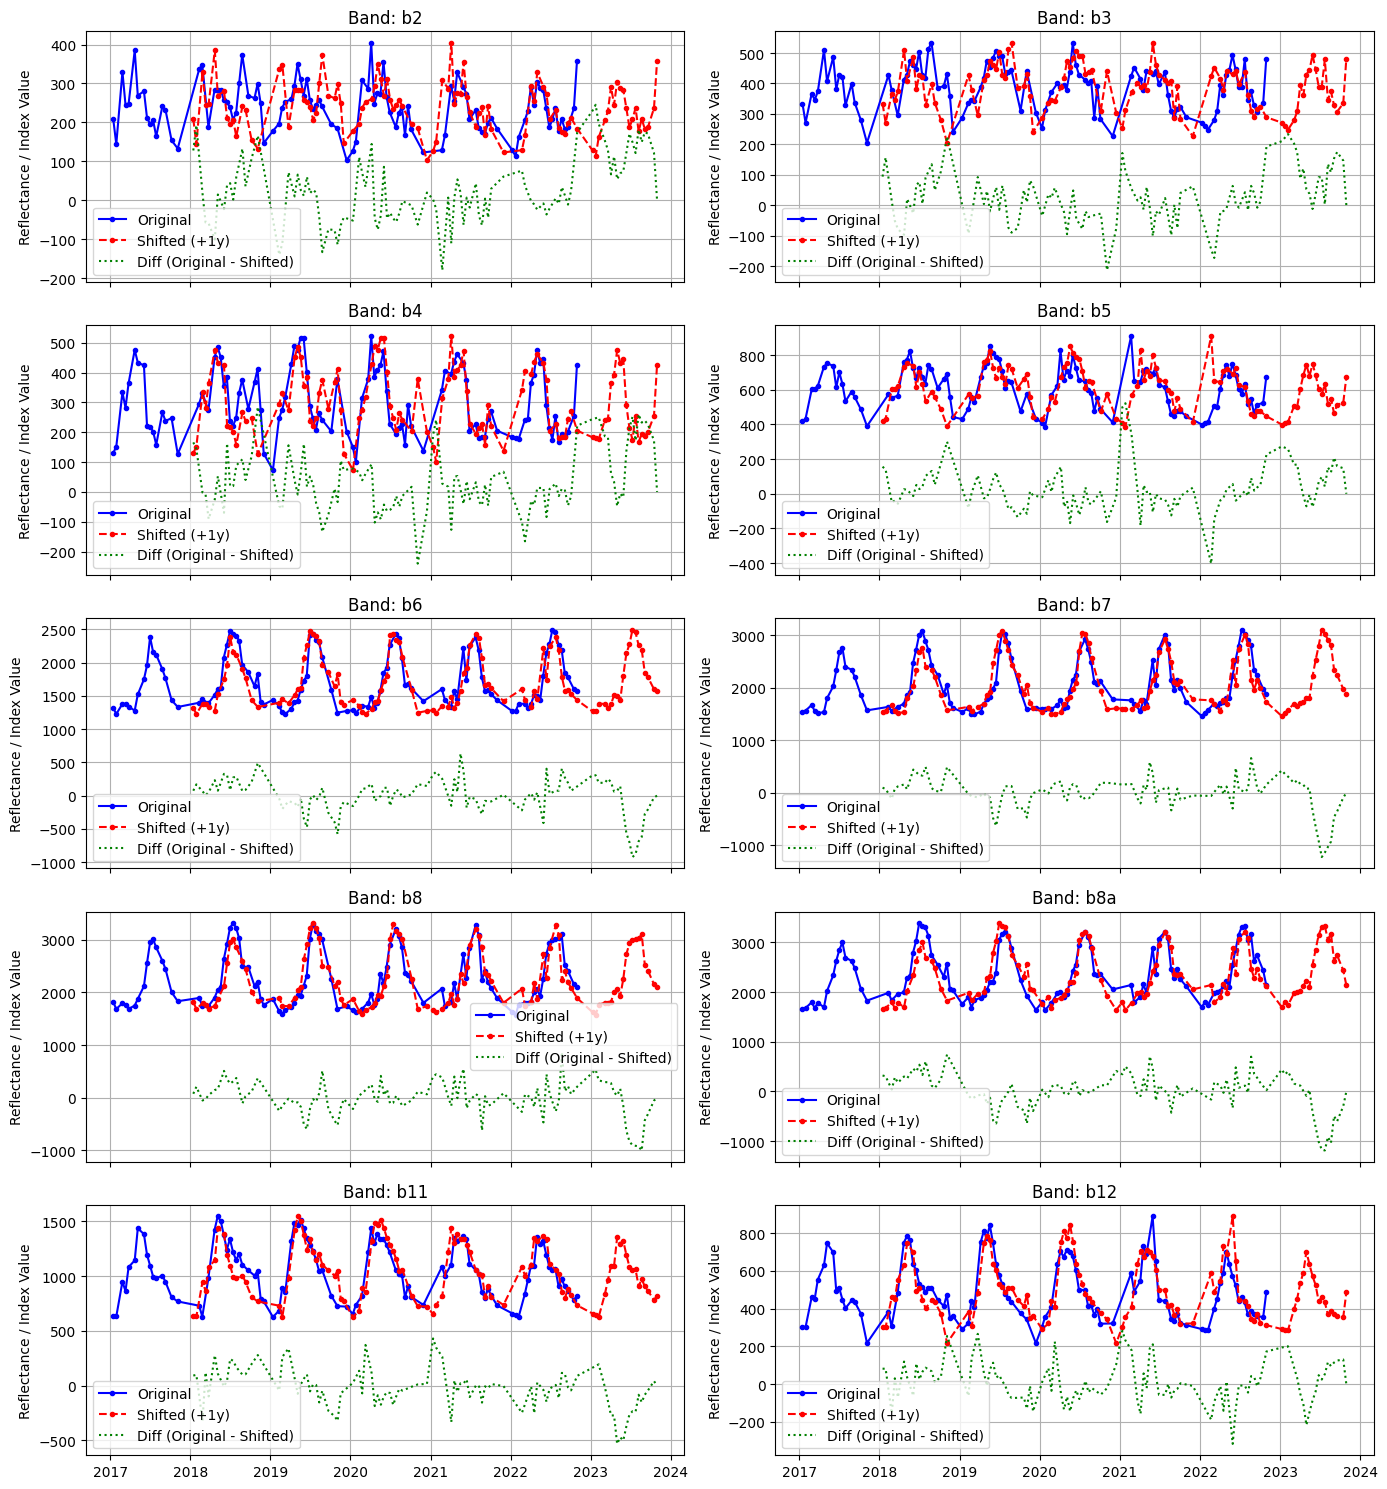

In [34]:
plot_band_differences(df_2w_agg, shift_years=1)

<div class="alert-info">

**Seasonal Patterns:**

Both the original (blue) and shifted (red) time series show strong seasonal cycles.
Peaks and troughs repeat roughly on an annual basis, which is typical for vegetation or water-related indices in satellite data.

**Shifted Series Alignment:**

The shifted series (+1 year, red) generally aligns well with the previous year’s patterns.
There are slight offsets in peak timing in some years, indicating inter-annual variability.

**Differences (Green Dotted Line):**

The difference (Original − Shifted) fluctuates around zero but shows pronounced deviations during certain years.
Positive spikes indicate that the current year’s values are higher than the previous year at the same period.
Negative spikes indicate that the current year’s values are lower than the previous year.
</div>

## Stationarity Analysis


=== B2 ===
ADF Test:
  Test Statistic: -3.7712
  p-value:        0.0032
  ⇒ Reject null hypothesis: Stationary

KPSS Test:
  Test Statistic: 0.8696
  p-value:        0.0100
  ⇒ Reject null hypothesis: Not stationary


=== B3 ===
ADF Test:
  Test Statistic: -2.1416
  p-value:        0.2281
  ⇒ Fail to reject null hypothesis: Not stationary

KPSS Test:
  Test Statistic: 0.6147
  p-value:        0.0213
  ⇒ Reject null hypothesis: Not stationary


=== B4 ===
ADF Test:
  Test Statistic: -1.5378
  p-value:        0.5147
  ⇒ Fail to reject null hypothesis: Not stationary

KPSS Test:
  Test Statistic: 0.7246
  p-value:        0.0113
  ⇒ Reject null hypothesis: Not stationary


=== B5 ===
ADF Test:
  Test Statistic: -1.9058
  p-value:        0.3293
  ⇒ Fail to reject null hypothesis: Not stationary

KPSS Test:
  Test Statistic: 0.5041
  p-value:        0.0407
  ⇒ Reject null hypothesis: Not stationary


=== B6 ===
ADF Test:
  Test Statistic: -0.8814
  p-value:        0.7940
  ⇒ Fail to reject 

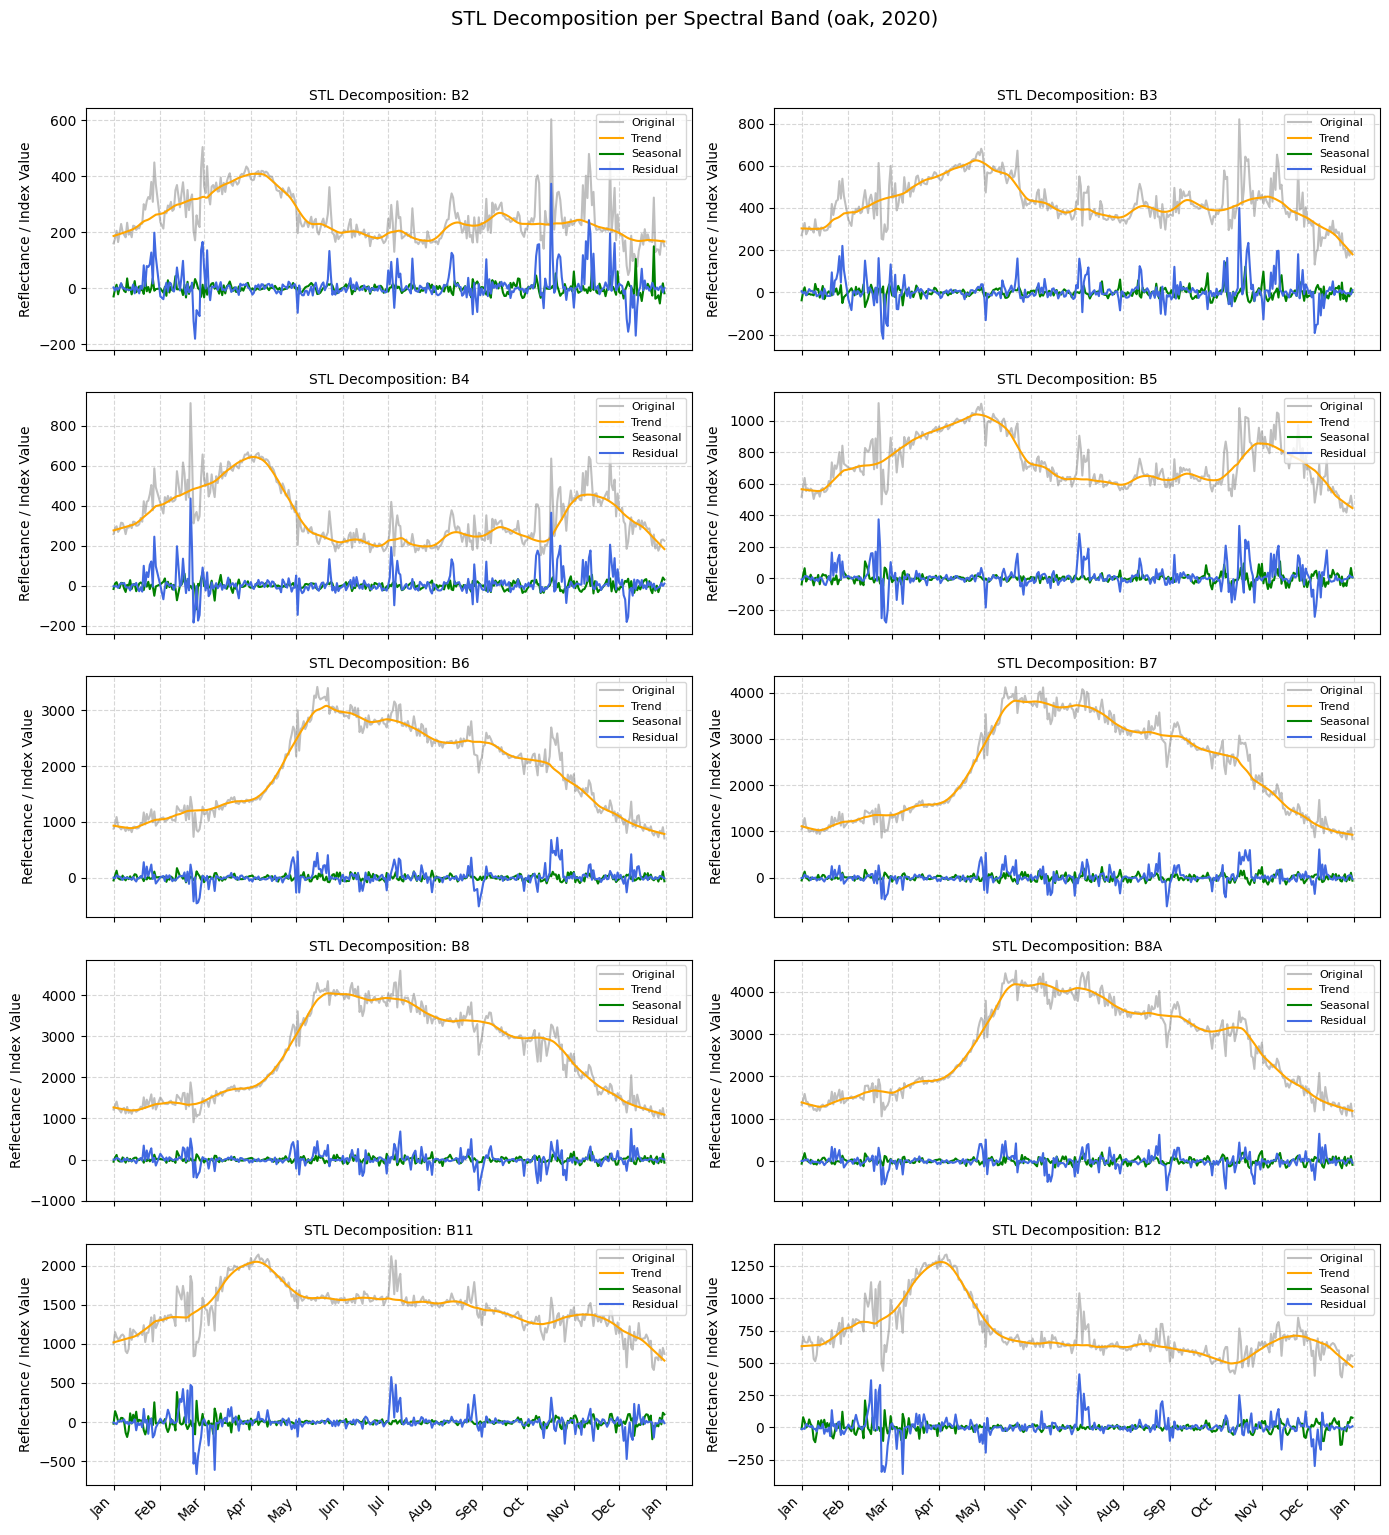

In [35]:
analyzer = StationarityAnalyzer(df_base)
analyzer.apply_stl_and_tests(spectral_bands)
analyzer.plot_stl_per_band(analyzer.df_trees, spectral_bands)

<div class="alert-info">

→ For feature-based models (Random Forest, SVM, XGBoost, etc.), 
  making the time series stationary can help generate more robust features 
  (mean, variance, frequencies...).

→ For deep learning models (RNN, LSTM, CNN, Transformers), 
  detrending can be counterproductive — models can learn patterns themselves. 
  In that case, normalization (e.g., z-score) and data augmentation are better. 
  Additionally, cyclical time encoding helps the model understand periodic patterns:

  - month_sin = sin(2π * m / 12)

  - month_cos = cos(2π * m / 12)

</div>

## Principal Component Analysis (PCA)

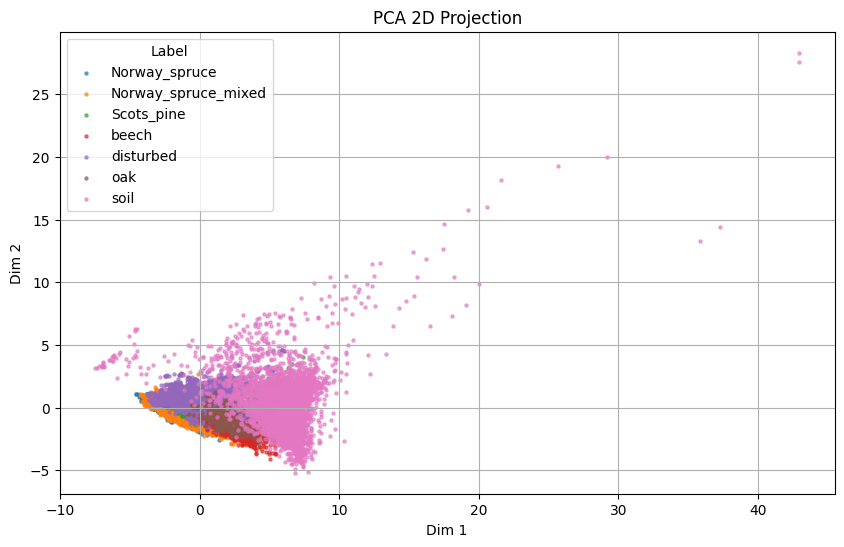

In [36]:
dr = SITS_DimensionalityReduction(method="PCA", n_components=3)
dr.fit(df, label_col="species")
dr.plot_2d()

<div class="alert-info">

- Clear separation of soil: **Soil points** are spread along PC1 (and partially PC2), indicating soil samples are clearly distinct from vegetation classes.
- Vegetation classes overlap: Tree species **(Norway spruce, Scots pine, oak, beech)** cluster near the center, showing similar feature patterns and no clear separation.
- Disturbed & mixed classes: These overlap strongly with other vegetation, suggesting no distinct patterns.
</div>

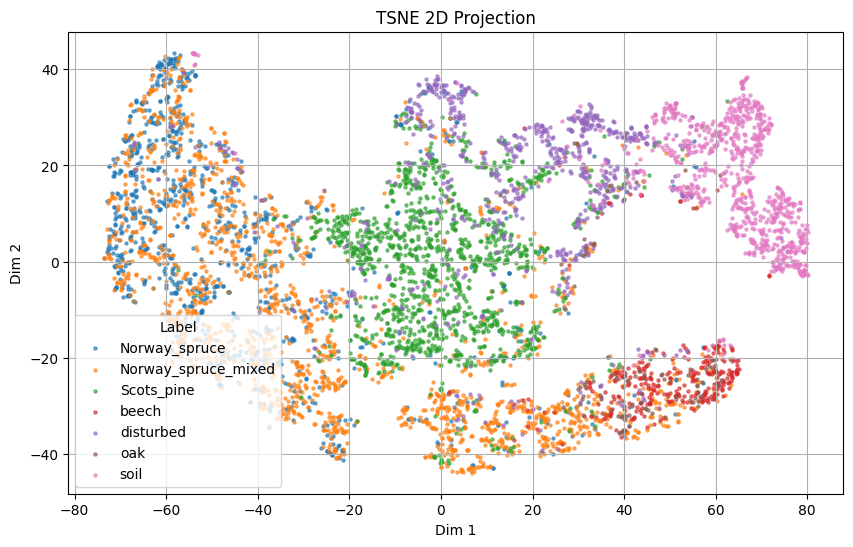

In [37]:
df_sample = dataloader.get_sample(df, n_ids=6000)
dr_tsne = SITS_DimensionalityReduction(method="tSNE", n_components=2, perplexity=50)
dr_tsne.fit(df_sample, label_col="species")
dr_tsne.plot_2d()

<div class="alert-info">

- Clear clusters: **soil** and **beech** form compact, well-separated clusters.
- Overlap: **Norway_spruce**, **Norway_spruce_mixed** and **Scots_pine** strongly overlap and are hard to separate.
- **Disturbed** partially mixes with conifer clusters.
- Summary: Some classes **(soil, beech)** are clearly separable, while conifer species show strong overlap.
</div>